In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("max_columns",100)
pd.set_option("max_colwidth",500)
sns.set(context="notebook", style="whitegrid", palette="deep")


DATA_DIR="data/"
DATA_DIR+="cleaned/"

In [33]:
df_train=pd.read_pickle(DATA_DIR+"train_cleaned.pkl")
df_train.head(2)

,title,link,description,long_description,id
0,ପ୍ରବଳ ଶୀତରେ ଥରୁଛି ସାରା ଓଡ଼ିଶା । ୧୩ଟି ଜିଲ୍ଲା ପାଇଁ ୟେଲୋ ୱାର୍ଣ୍ଣିଂ ଜାରି କଲା ପାଣିପାଗ ବିଭାଗ : କୋଇଡା ଓ ଦାରିଙ୍ଗବାଡିରେ ତୁଷାରପାତ,https://www.newspointapp.com/odia-news/publisher-kanaknews-odia/top-news/articleshow/145048207eb97f903061bbd718a8a970ef3652c3,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବିକ ଠାରୁ ୬ଡିଗ୍ରୀ ଖସିଆସିଛି ପାରଦ । ଆହୁରି ଦୁଇ ଦିନ ଅତି ପ୍ରବଳ ଥଣ୍ଡା ଅନୁଭୂତ ହେବ । ଏଥିପାଇଁ ଅଧି ଓଡିଶାରେ ୟେଲୋ ୱାର୍ଣ୍ଣିଂ ଜାରି ହୋଇଛି । ୧୩ଟି ଜିଲ୍ଲାରେ ଜିଲ୍ଲା ପ୍ରଶାସନକୁ ସ...,କନକ ବ୍ୟୁରୋ : ଜାଡରେ ଥରୁଛି ସାରା ଓଡିଶା । ସ୍ୱାଭାବିକ ଠାରୁ ୬ଡିଗ୍ରୀ ଖସିଆସିଛି ପାରଦ । ଆହୁରି ଦୁଇ ଦିନ ଅତି ପ୍ରବଳ ଥଣ୍ଡା ଅନୁଭୂତ ହେବ । ଏଥିପାଇଁ ଅଧି ଓଡିଶାରେ ୟେଲୋ ୱାର୍ଣ୍ଣିଂ ଜାରି ହୋଇଛି । ୧୩ଟି ଜିଲ୍ଲାରେ ଜିଲ୍ଲା ପ୍ରଶାସନକୁ ସ...,2674
1,'संघर्षशील और जुझारू संस्कृतिकर्मी थे संदीपन विमलकांत नागर',https://navbharattimes.indiatimes.com/metro/lucknow/other-news/sandeepan-vimalkant-nagar-was-a-struggling-and-combative-cultural-worker/articleshow/73022935.cms,\Bसंदीपन ने कलाकारों को दिशा देने के साथ नाट्य चेतना जाग्रत की। यह बात वरिष्ठ रंगकर्मी और अभिनेता राकेश पाण्डेय ने मथुरा के रंगकर्मी और ब्रजभाषी ...,"B Sandipan awakened the play with consciousness giving direction to the artists. This was said by senior painter and actor Rakesh Pandey, Mathura color worker and Braj-speaking ...",3874


Text(0.5, 1.0, 'NAs in columns')

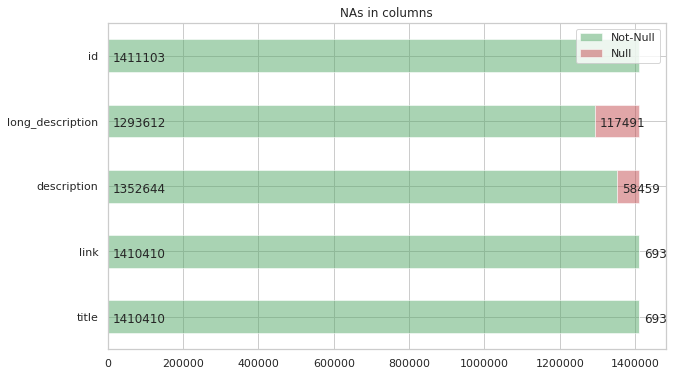

In [46]:
df_nulls=df_train.isna().apply(pd.Series.value_counts).T
df_nulls.columns=['Not-Null', 'Null']
ax=df_nulls.plot(kind="barh", stacked=True, figsize=(10,6), alpha=0.5, color=sns.color_palette()[2:4])
for p in ax.patches:
    width=p.get_width()
    if width!=0:
        ax.annotate("%d"%width, 
                (p.get_x(), p.get_y()), 
                xytext=(5, 10),
                textcoords='offset points')
plt.title("NAs in columns")

In [10]:
df_train['id'].unique().shape

(1411103,)

In [3]:
from preprocess import get_sentences
from urllib.parse import urlparse
from pandarallel import pandarallel
import gc

# pandarallel.initialize(nb_workers=3, progress_bar=True)
pandarallel.initialize()

def parse_urls(row):
    return urlparse(row).path

urls=df_train['link'].dropna().parallel_apply(parse_urls)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [9]:
urls=get_sentences(urls, progress=True)

In [6]:
del df_train
gc.collect()

44

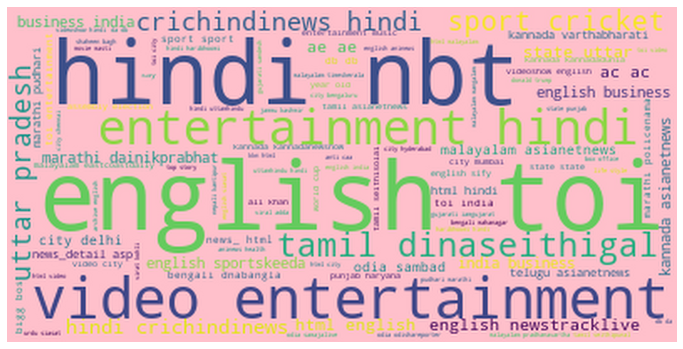

In [18]:
from wordcloud import WordCloud
import re
plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="pink").generate(re.sub(r' .{2} '," "," ".join(urls).replace(" news ", "").replace("publisher", "").replace(" new ", "").replace(" toparticleshow ", "").replace(" articleshow ", "")))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

In [4]:
df_langs=pd.read_csv(DATA_DIR+"langs.csv")
df_langs=df_langs.set_index('id')
df_langs.head()

,title_lang,description_lang,long_description_lang
id,,,
2674,ne,ne,ne
3874,hi,hi,en
425,mr,unknown,unknown
5177,en,en,en
3260,ta,ta,en


### Top 20 languages for title, description and long_description
> As evident, most available long_descriptions are in english

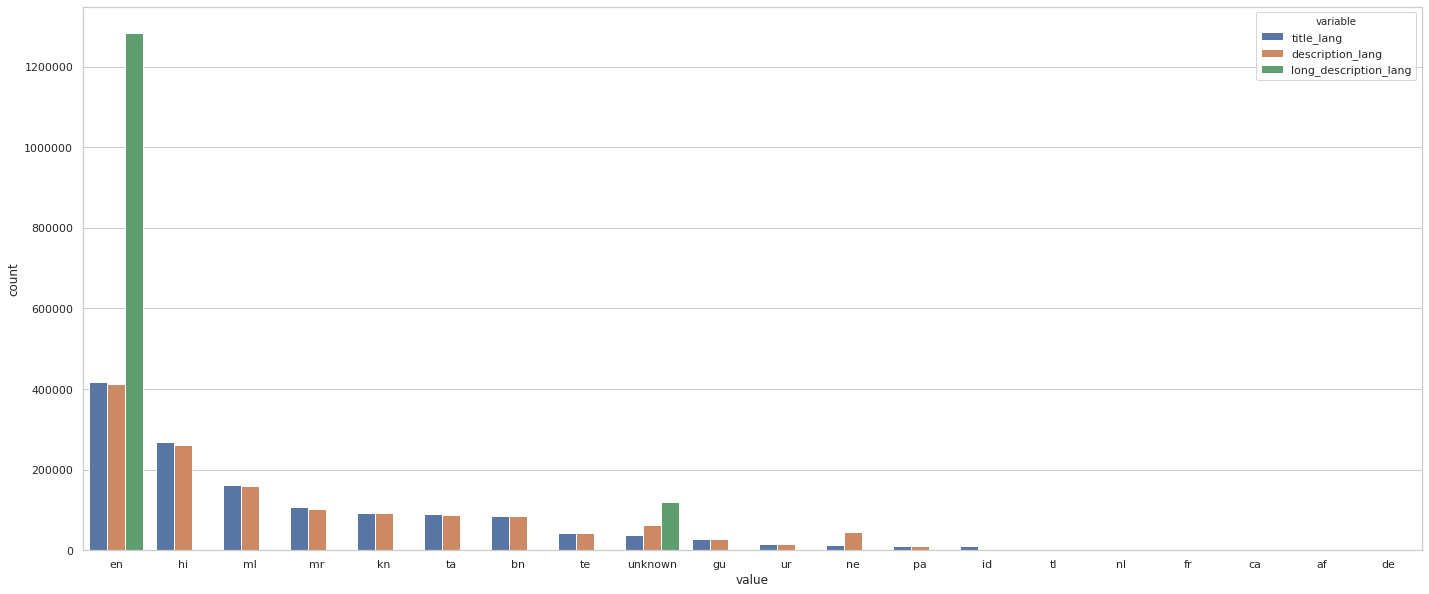

In [23]:
plt.figure(figsize=(24,10))
sns.countplot(x="value", hue="variable", data=pd.melt(df_langs), order=df_langs['title_lang'].value_counts().iloc[:20].index)
plt.show()

### Number of titles in each language

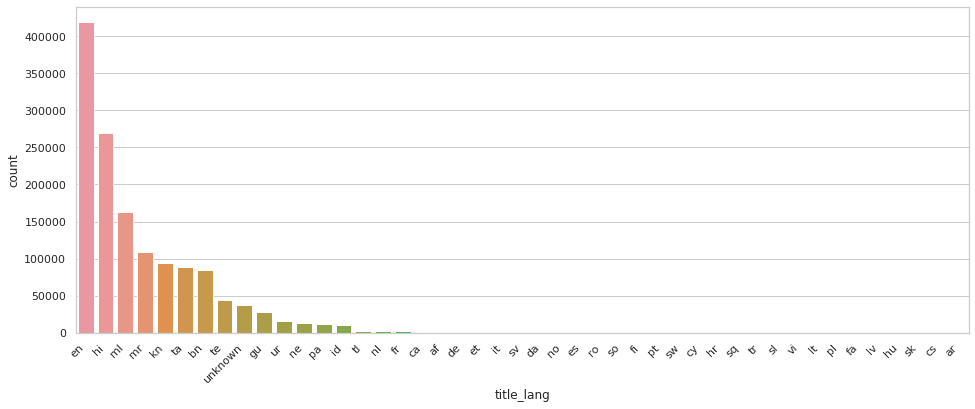

In [31]:
plt.figure(figsize=(16,6))
plot=sns.countplot(x='title_lang', data=df_langs, order=df_langs['title_lang'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### How many articles with no long_description have either of title or decription in english

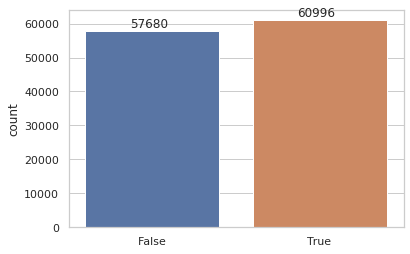

In [22]:
ax=sns.countplot(np.any(df_langs[df_langs['long_description_lang']=='unknown']=='en', axis=1))
for p in ax.patches:
    ax.annotate('%d'%(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+1000))

### Use title/description for unknown 60996 and just clean the url for the rest.